# 数据挖掘第一次互评作业（10G数据）
## 姓名：张鹏 学号：3120241388

### 1 准备工作及查看数据集

#### 1.1 导入必要的包

In [1]:
# 导入必要的包
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import font_manager, rcParams
import matplotlib
import seaborn as sns
import json

#### 1.2 屏蔽不必要的Warning

In [2]:
# 屏蔽一些不必要的Warning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
matplotlib.set_loglevel("error")

所以服务器无法安装中文字体，所以这里屏蔽的主要是由于显示中文字体所出现的Warning

#### 1.3 配置中文字体

In [3]:
# 由于数据集中有中文字体,而所使用的服务器上面没有配置中文字体,所以这里设置一些中文字体的显示问题
font_path = '/home/pengzhang/anaconda3/envs/DDPM-New/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/simhei.ttf'
my_font = font_manager.FontProperties(fname=font_path)
font_name = my_font.get_name()
print(f"✔️ 成功加载字体：{font_name}")
rcParams['font.family'] = font_name

✔️ 成功加载字体：SimHei


#### 1.4 查看数据集并对数据集进行了解

In [4]:
# 查看当前文件夹下有哪些数据集以及数据集所处的路径
# 获取data文件夹中所有parquet文件的路径
parquet_files = glob.glob(os.path.join("/data7/pengzhang/Class/Data_Mining/Homework01_dataset/10G_data", "*.parquet"))
print(parquet_files)

['/data7/pengzhang/Class/Data_Mining/Homework01_dataset/10G_data/part-00004.parquet', '/data7/pengzhang/Class/Data_Mining/Homework01_dataset/10G_data/part-00005.parquet', '/data7/pengzhang/Class/Data_Mining/Homework01_dataset/10G_data/part-00001.parquet', '/data7/pengzhang/Class/Data_Mining/Homework01_dataset/10G_data/part-00006.parquet', '/data7/pengzhang/Class/Data_Mining/Homework01_dataset/10G_data/part-00007.parquet', '/data7/pengzhang/Class/Data_Mining/Homework01_dataset/10G_data/part-00003.parquet', '/data7/pengzhang/Class/Data_Mining/Homework01_dataset/10G_data/part-00000.parquet', '/data7/pengzhang/Class/Data_Mining/Homework01_dataset/10G_data/part-00002.parquet']


In [5]:
import time
start_time = time.time()

# 读取并合并所有parquet文件
df_list = [pd.read_parquet(file) for file in parquet_files]
df = pd.concat(df_list, ignore_index=True)
# 显示合并后的DataFrame信息
print(df.head())

end_time = time.time()
print(f"读取10G数据所用时间: {end_time - start_time:.2f} 秒")


# 数据集的含义
# 列名------------------含义
# id                用户的唯一编号
# timestamp         记录创建或最后更新的时间
# user_name         系统中的用户名
# chinese_name      用户的中文姓名
# email             用户的电子邮箱地址
# age               用户的年龄
# income            用户的年收入
# gender            性别
# country           国家
# chinese_address   中文地址
# purchase_history  购买历史
# is_active         是否为活跃用户
# registration_date 注册日期
# credit_score      用户的信用评分
# phone_number      用户的联系电话

   id                  timestamp  user_name chinese_name  \
0   1  2024-12-20T19:30:36+00:00   xsyxsrvt           廖亮   
1   2  2023-12-08T15:55:24+00:00     QILDIW           谢芳   
2   3  2025-02-03T20:13:49+00:00    NXMSOJN          蔡秀英   
3   4  2024-05-19T18:33:56+00:00   OKVKJOQA           汪明   
4   5  2023-05-02T09:11:31+00:00  TKZDVTZSN          秦秀英   

                  email  age    income gender country  \
0  xxpyxvds@hotmail.com   19  622000.0      男      中国   
1  pagkjgxr@hotmail.com   40   20000.0      女     俄罗斯   
2    nvdjmyij@gmail.com   60   53000.0      女    澳大利亚   
3  dblskeyb@outlook.com   74  271000.0      女    澳大利亚   
4  suskeold@hotmail.com   73   66000.0      男      中国   

           chinese_address                                   purchase_history  \
0      上海市中山人民路178号3单元1510  {"average_price":843.5799999999999,"category":...   
1     湖南省乌鲁木齐健康路168号1单元459  {"average_price":276.31,"category":"食品","items...   
2   广西壮族自治区中山复兴路61号5单元1912  {"average_price":213.94,"

In [6]:
print(df.dtypes)  # 每列数据的数据类型

id                     int64
timestamp             object
user_name             object
chinese_name          object
email                 object
age                    int64
income               float64
gender                object
country               object
chinese_address       object
purchase_history      object
is_active               bool
registration_date     object
credit_score           int64
phone_number          object
dtype: object


In [7]:
print(df.shape)   # 数据集的大小

(100000000, 15)


可以看出10G的数据集总共有1亿例数据，每一例数据有15个属性

### 2 数据可视化分析

#### 2.1 人口统计分布

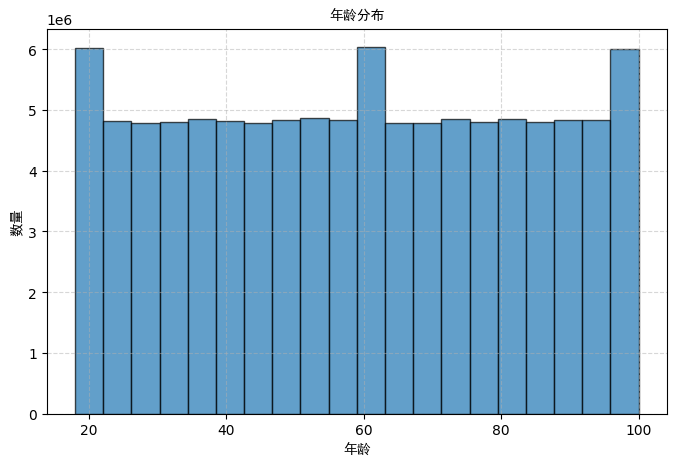

In [8]:
# 年龄分布
plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=20, edgecolor='black', alpha=0.7)
plt.title("年龄分布", fontproperties=my_font)
plt.xlabel("年龄", fontproperties=my_font)
plt.ylabel("数量", fontproperties=my_font)
plt.grid(True, linestyle='--', alpha=0.5)  # 可选：加网格
plt.show()

从上面的年龄分布中可以看出，数据集的年龄分布比较均衡，每个年龄段基本上都有一定的数据量；此外，在20、60和100年龄段的人数相对较多一些

Text(0.5, 1.0, '性别比例')

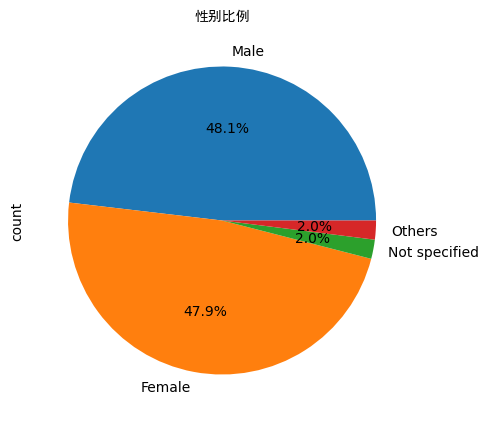

In [9]:
# 性别分布
# 由于无法展示中文字体, 所以这里将中文改为英文
gender_mapping = {'男': 'Male', '女': 'Female', '未指定': 'Not specified', '其他': 'Others'}
df['gender_en'] = df['gender'].map(gender_mapping)
plt.figure(figsize=(8, 5))
df['gender_en'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('性别比例', fontproperties=my_font)

从性别分布的饼状图中可以看出，男女性别基本上呈现出1:1，性别比例较为均衡

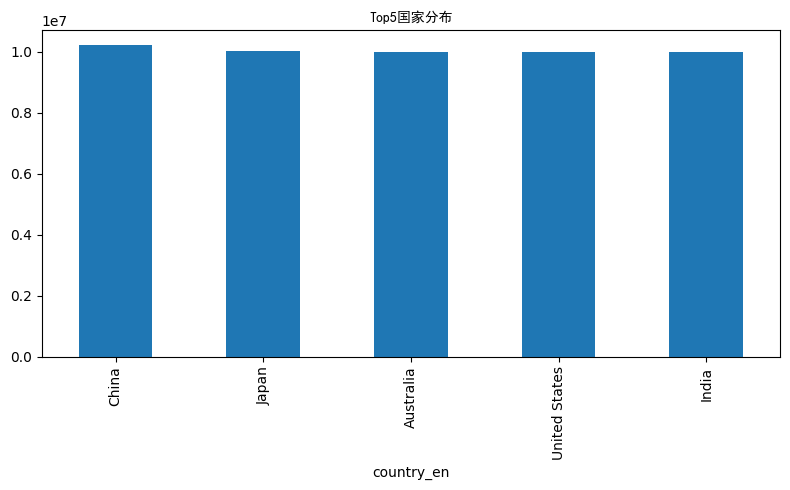

In [10]:
# 国家分布
# 构建中文到英文的国家名称映射字典
country_mapping = {
    '中国': 'China',
    '俄罗斯': 'Russia',
    '澳大利亚': 'Australia',
    '美国': 'United States',
    '英国': 'United Kingdom',
    '加拿大': 'Canada',
    '日本': 'Japan',
    '德国': 'Germany',
    '法国': 'France',
    '印度': 'India'
}
# 创建新列存储英文国家名称（保留原始数据）
df['country_en'] = df['country'].map(country_mapping).fillna('Other')

plt.figure(figsize=(8, 5))
df['country_en'].value_counts().head(5).plot.bar()
plt.title('Top5国家分布', fontproperties=my_font)
plt.tight_layout()

从上图的国家分布统计来看，数据集主要来自中国（China）、日本（Japan）、澳大利亚（Australia）、美国（United States）和印度（India）

#### 2.2 经济指标分析

Text(0.5, 1.0, '性别收入分布')

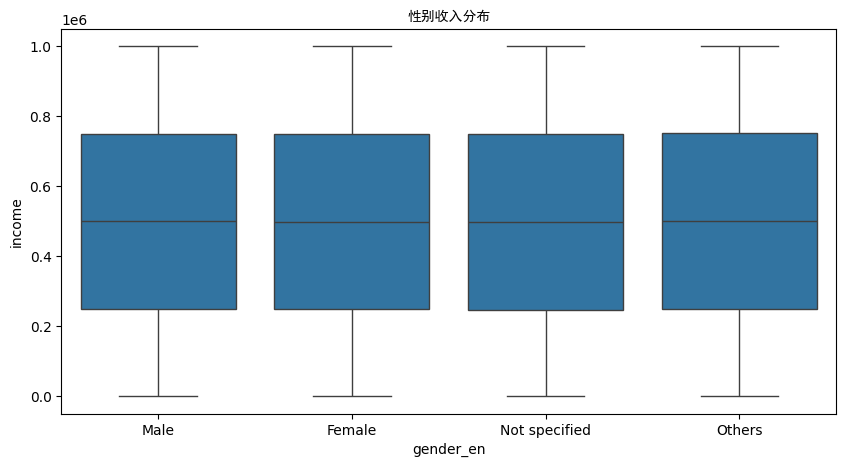

In [11]:
plt.figure(figsize=(10,5))
gender_mapping = {'男': 'Male', '女': 'Female', '未指定': 'Not specified', '其他': 'Others'}
df['gender_en'] = df['gender'].map(gender_mapping)
sns.boxplot(x='gender_en', y='income', data=df)
plt.title('性别收入分布', fontproperties=my_font)

可以看出不同的性别之间的收入基本上一致，这说明收入和性别之间没有明显的相关性。

运行时间：336.26 秒


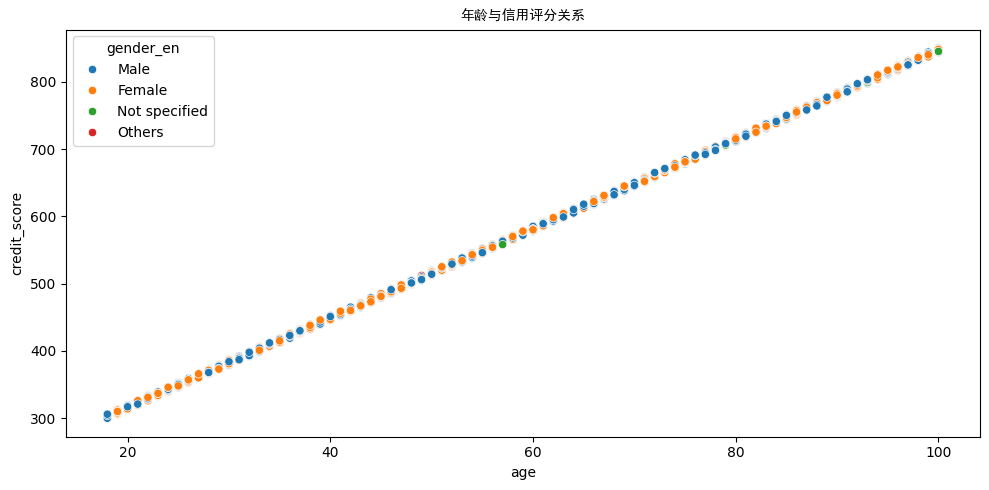

In [12]:
import time
start_time = time.time()

plt.figure(figsize=(10,5))
gender_mapping = {'男': 'Male', '女': 'Female', '未指定': 'Not specified', '其他': 'Others'}
df['gender_en'] = df['gender'].map(gender_mapping)
sns.scatterplot(x='age', y='credit_score', hue='gender_en', data=df)
plt.title('年龄与信用评分关系', fontproperties=my_font)
plt.tight_layout()

end_time = time.time()
print(f"运行时间：{end_time - start_time:.2f} 秒")

可以看出年龄（age）和信用评分（credit score）之间基本符合一个正比例的关系，这说明随着年龄的增长，信用评分也相应地线性增加；此外，这一现象在不同的性别之间均有所体现

#### 2.3 用户注册时间分析

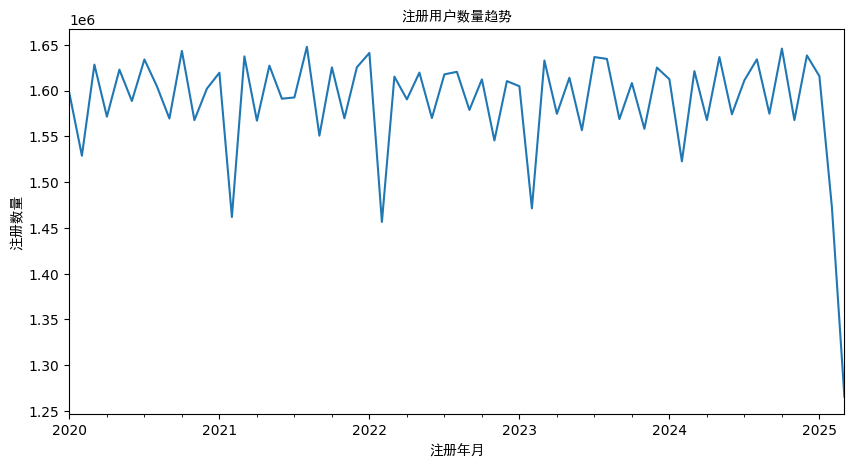

In [13]:
df['registration_date'] = pd.to_datetime(df['registration_date'])
df['reg_year_month'] = df['registration_date'].dt.to_period('M')
reg_count = df['reg_year_month'].value_counts().sort_index()
reg_count.plot(kind='line', figsize=(10,5))
plt.title('注册用户数量趋势', fontproperties=my_font)
plt.xlabel("注册年月", fontproperties=my_font)
plt.ylabel("注册数量", fontproperties=my_font)
plt.show()

从上图中不同时间段用户注册数量的变化趋势中，可以看出每年的初始第一个月份用户的注册数量有所下降，然后在后面的几个月逐渐回升趋于稳定。

### 3 数据预处理

In [14]:
# 记录一下数据预处理之前数据集的大小
before_preprocessing_dataset_size = df.shape[0]

#### 3.1 数据类型转换

In [15]:
from datetime import datetime
# 转换日期类型
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['registration_date'] = pd.to_datetime(df['registration_date'])

将原始时间进行转换，方便后续处理。

#### 3.2 数据异常情况分析

In [16]:
import time
start_time = time.time()

# 打印删除前数据的行数
print(f"删除前数据的行数：{df.shape[0]}")
# 检查每列的缺失值情况
missing = df.isnull().sum()
print("缺失值情况：\n", missing[missing > 0])
# 如果存在缺失值的行，删除这些行
if missing.any():  # 如果有任何列存在缺失值
    df = df.dropna()
# 输出删除后的数据大小变化
print(f"删除缺失值后的数据集总共有 {df.shape[0]} 行")

end_time = time.time()
print(f"运行时间：{end_time - start_time:.2f} 秒")

删除前数据的行数：100000000


缺失值情况：
 Series([], dtype: int64)
删除缺失值后的数据集总共有 100000000 行
运行时间：120.86 秒


可以看出10G这个数据集中不存在缺失数据的情况

In [17]:
import time
start_time = time.time()

# 打印删除前数据的行数
print(f"删除前数据的行数：{df.shape[0]}")
# 打印重复行数
print("重复行数：", df.duplicated().sum())
# 删除重复的行
df = df.drop_duplicates()
# 打印删除后数据的行数
print(f"删除后数据的行数：{df.shape[0]}")

end_time = time.time()
print(f"运行时间：{end_time - start_time:.2f} 秒")

删除前数据的行数：100000000


重复行数： 99200000


删除后数据的行数：800000
运行时间：839.06 秒


可以看出10G这个数据集中存在完全重复的数据，所以需要直接删除这个些数据

In [18]:
df['age'].describe()

count    800000.000000
mean         59.016734
std          23.950509
min          18.000000
25%          38.000000
50%          59.000000
75%          80.000000
max         100.000000
Name: age, dtype: float64

可以看出年龄分布在18~100之间，没有异常

In [19]:
df['income'].describe()

count     800000.000000
mean      499354.662500
std       289019.305393
min            0.000000
25%       249000.000000
50%       499000.000000
75%       750000.000000
max      1000000.000000
Name: income, dtype: float64

可以看出收入分布在0~1000000之间，没有异常

In [20]:
df['credit_score'].describe()

count    800000.000000
mean        575.111311
std         159.003137
min         300.000000
25%         437.000000
50%         575.000000
75%         713.000000
max         850.000000
Name: credit_score, dtype: float64

可以看出credit_score分布在300~850之间，没有异常

In [21]:
import time
start_time = time.time()

# 打印删除前数据的行数
print(f"删除前数据的行数：{df.shape[0]}")
# 计算并打印存在重复的 phone_number 总数
total_duplicate_ids = (df['phone_number'].value_counts() > 1).sum()
print(f"存在重复的phone_number总数:{total_duplicate_ids}")
# 删除 'phone_number' 列中重复的行，只保留第一次出现的
df = df.drop_duplicates(subset='phone_number', keep='first')
# 打印删除后数据的行数
print(f"删除后数据的行数：{df.shape[0]}")

end_time = time.time()
print(f"运行时间：{end_time - start_time:.2f} 秒")

删除前数据的行数：800000


存在重复的phone_number总数:44


删除后数据的行数：799956
运行时间：1.03 秒


说明存在重复的phone_number，属于数据异常，需要删除此类数据

In [22]:
import time
start_time = time.time()

# 打印删除前数据的行数
print(f"删除前数据的行数：{df.shape[0]}")
import re
# 需要检测的列
columns_to_check = ['user_name', 'chinese_name', 'country', 'chinese_address']
# 定义一个正则表达式：允许“中英文”字符
# email 字段可能需要允许特殊符号，所以单独处理
zh_en_pattern = re.compile(r'^[a-zA-Z\u4e00-\u9fa5]+$')
email_pattern = re.compile(r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$')
zh_address_pattern = re.compile(r'^[a-zA-Z0-9\u4e00-\u9fa5]+$')
# 循环检查每一列的合法性
for col in columns_to_check:
    if col == 'email':
        mask = ~df[col].apply(lambda x: bool(email_pattern.match(str(x))))
    elif col == 'chinese_address':
        mask = ~df[col].apply(lambda x: bool(zh_address_pattern.match(str(x))))
    else:
        mask = ~df[col].apply(lambda x: bool(zh_en_pattern.match(str(x))))
    # 将每列的检测结果存储在 df 的新列中，标记为 '_invalid'
    df[col + '_invalid'] = mask
# 标记任何列中含有错误的行
any_invalid_mask = df[[col + '_invalid' for col in columns_to_check]].any(axis=1)
# 删除含有乱码的行
df = df[~any_invalid_mask]
# 输出处理后的结果
print(f"存在乱码的行数：{any_invalid_mask.sum()}")
print(df[columns_to_check].head())
# 打印删除后数据的行数
print(f"删除后数据的行数：{df.shape[0]}")

end_time = time.time()
print(f"运行时间：{end_time - start_time:.2f} 秒")

删除前数据的行数：799956


存在乱码的行数：0
   user_name chinese_name country          chinese_address
0   xsyxsrvt           廖亮      中国      上海市中山人民路178号3单元1510
1     QILDIW           谢芳     俄罗斯     湖南省乌鲁木齐健康路168号1单元459
2    NXMSOJN          蔡秀英    澳大利亚   广西壮族自治区中山复兴路61号5单元1912
3   OKVKJOQA           汪明    澳大利亚     江苏省石家庄广州路182号3单元2003
4  TKZDVTZSN          秦秀英      中国  宁夏回族自治区重庆幸福路117号7单元2367
删除后数据的行数：799956
运行时间：2.41 秒


从运行结果中可以看出数据集不存在乱码的现象

In [23]:
# 总结一下预处理后数据集的变化情况
rows_before = before_preprocessing_dataset_size
rows_after = df.shape[0]
rows_removed = rows_before - rows_after
# 输出优化后的信息
print(f'预处理前数据集总共有 {rows_before} 行')
print(f'预处理后数据集总共有 {rows_after} 行')
print(f'数据集总共减少 {rows_removed} 行')

预处理前数据集总共有 100000000 行
预处理后数据集总共有 799956 行
数据集总共减少 99200044 行


### 4 分析实现

#### 4.1 特征工程

In [24]:
import json

# 创建一个新的列，提取 average_price
df['average_price'] = df['purchase_history'].apply(lambda x: json.loads(x)['average_price'])
df['items_count'] = df['purchase_history'].apply(lambda x: len(json.loads(x)['items']))

# 计算消费总金额
df['total_spent'] = df['average_price'] * df['items_count']

# 创建年龄分段
bins = [18,30,45,60,100]
labels = ['青年','中年','中老年','老年']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

#### 4.1 用户画像

In [25]:
import time
start_time = time.time()

# 按年龄段、性别、国家分组，计算各用户群体的平均收入、平均信用分和平均消费金额
profile = df.groupby(['age_group', 'gender', 'country']).agg(
    avg_income=('income', 'mean'),          # 计算每组的平均收入
    avg_credit=('credit_score', 'mean'),   # 计算每组的平均信用评分
    avg_spent=('total_spent', 'mean')      # 计算每组的平均消费金额
).reset_index().sort_values('avg_spent', ascending=False)  # 将分组索引转回普通列，方便后续操作
                                                           # 按照平均消费金额降序排列，找出最“舍得花钱”的用户群体
# 输出消费能力最强的前三类典型用户画像
print("高价值用户特征：")
print(profile.head(3))

end_time = time.time()
print(f"运行时间：{end_time - start_time:.2f} 秒")

高价值用户特征：
    age_group gender country     avg_income  avg_credit    avg_spent
100       中老年    未指定      中国  494293.233083  534.120301  2950.562256
140        老年    未指定      中国  491446.575342  718.200000  2919.473288
67         中年    未指定    澳大利亚  490130.081301  435.780118  2865.452956
运行时间：0.13 秒


/tmp/ipykernel_45846/4167669971.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profile = df.groupby(['age_group', 'gender', 'country']).agg(


从运行结果来看，消费能力最强的用户群体集中在中老年和老年年龄段，且性别和国家方面存在一些相似性。尤其是未指定性别和中国、澳大利亚的用户群体在消费方面表现突出。这表明在这些年龄段的用户，尽管信用分数和收入有所差异，但他们的消费金额相对较高，可能与生活方式、购买力以及个人偏好有关

#### 4.2 高价值用户识别

运行时间：11.45 秒


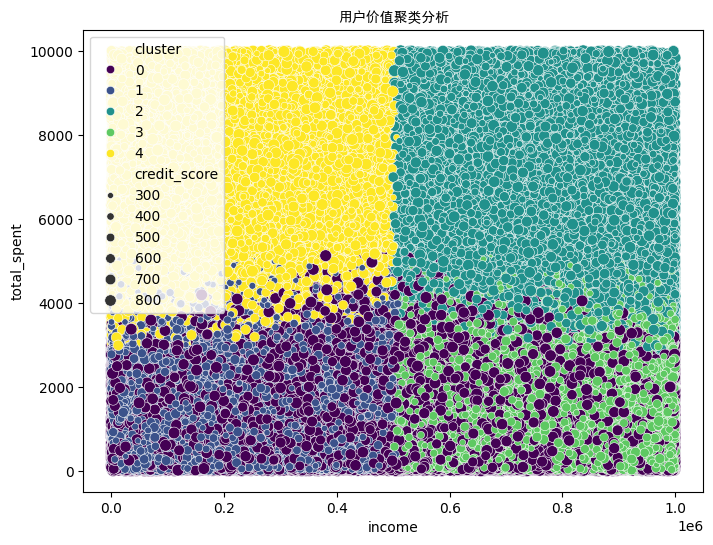

In [26]:
import time
start_time = time.time()

# 导入需要的库
from sklearn.cluster import KMeans              # KMeans 聚类算法
from sklearn.preprocessing import StandardScaler # 数据标准化工具

# 1. 选择需要进行聚类分析的特征列：收入、总消费、信用分
X = df[['income', 'total_spent', 'credit_score']]

# 2. 对数据进行标准化处理（标准化后，特征的均值为0，标准差为1，避免某个特征占主导地位）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # 将数据进行标准化转换

# 3. 使用 KMeans 聚类算法进行聚类，设定将数据分为 5 类（n_clusters=5）
kmeans = KMeans(n_clusters=5)

# 4. 使用 KMeans 聚类算法对标准化后的数据进行拟合，并为每个样本分配一个聚类标签
df['cluster'] = kmeans.fit_predict(X_scaled)  # 将每个样本所属的聚类标签存入 'cluster' 列中

# 5. 可视化聚类结果
plt.figure(figsize=(8, 6))  # 设置图像的尺寸为 8x6 英寸

# 使用 Seaborn 的散点图绘制聚类结果
sns.scatterplot(
    x='income',            # x 轴：收入
    y='total_spent',       # y 轴：总消费
    hue='cluster',         # 根据聚类标签显示不同颜色
    size='credit_score',   # 点的大小根据信用分来变化
    data=df,               # 使用的数据集是 df
    palette='viridis'      # 设置颜色调色板为 'viridis'
)

# 6. 设置图表标题并指定字体，确保中文显示正常
plt.title('用户价值聚类分析', fontproperties=my_font)  # 标题显示为 "用户价值聚类分析"，并使用指定的字体

end_time = time.time()
print(f"运行时间：{end_time - start_time:.2f} 秒")

从运行结果图来看，用户群体根据收入、总消费和信用分被划分为5个聚类。可以观察到，收入较高的群体主要集中在右上方（income 较大），而消费金额（total_spent）和信用分（credit_score）则呈现出一定的分布趋势。特别是，聚类标签0（黄色）代表的是收入和消费均较高的群体，这些用户可能具有较强的消费能力